In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [92]:
df.isna().sum()

track                    0
artist                   0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [96]:
df.iloc[574:575]

,track,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,110,A,Major,53,75,69,7,0,17,3


In [11]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=953, step=1)

In [13]:
df.shape

(953, 24)

In [40]:
df.rename(columns={'track_name' : 'track', 'artist(s)_name' : 'artist'}, inplace=True)

In [41]:
df.artist

0        Latto, Jung Kook
1             Myke Towers
2          Olivia Rodrigo
3            Taylor Swift
4               Bad Bunny
              ...        
948          Selena Gomez
949          Taylor Swift
950    Feid, Paulo Londra
951    Feid, Sech, Jhayco
952             Burna Boy
Name: artist, Length: 953, dtype: object

In [74]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [95]:
max_streams = df['streams'].max()
df[df['streams'] == max_streams]

,track,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7


In [99]:
df['artist'].unique()

array(['Latto, Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave, Central Cee',
       'Eslabon Armado, Peso Pluma', 'Quevedo', 'Gunna',
       'Peso Pluma, Yng Lvcas', 'Bad Bunny, Grupo Frontera', 'NewJeans',
       'Miley Cyrus', 'David Kushner', 'Harry Styles', 'SZA',
       'Fifty Fifty', 'Billie Eilish', 'Feid, Young Miko', 'Jimin',
       'Gabito Ballesteros, Junior H, Peso Pluma', 'Arctic Monkeys',
       'Bizarrap, Peso Pluma', 'The Weeknd, Madonna, Playboi Carti',
       'Fuerza Regida', 'Rï¿½ï¿½ma, Selena G', 'Tainy, Bad Bunny',
       'Morgan Wallen', 'Dua Lipa', 'Troye Sivan',
       'Peso Pluma, Grupo Frontera',
       'The Weeknd, 21 Savage, Metro Boomin', 'Karol G, Shakira',
       'Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk',
       'Yahritza Y Su Esencia, Grupo Frontera', 'Junior H, Peso Pluma',
       'Post Malone, Swae Lee', 'Bebe Rexha, David Guetta',
       'Tyler, The Creator, Kali Uchis', 'Nic

In [104]:
billie = df[df['artist'] == 'Billie Eilish']
most_streamed = billie['streams'].max()

billie[billie['streams'] == most_streamed]

,track,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
531,Happier Than Ever,Billie Eilish,1,2021,7,30,8476,0,1.056760e+09,138,...,65,NaN,Major,31,31,24,76,0,14,4


In [107]:
playlist = df['in_spotify_playlists'].max()

df[df['in_spotify_playlists'] == playlist]

,track,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613.0,203,...,116,F#,Minor,79,87,81,4,0,10,4


In [139]:
spot = df['in_spotify_charts'].sum()
apple = df['in_apple_charts'].sum()
dee = df['in_deezer_charts'].sum()

total = spot + apple + dee

s_percent = spot / total * 100
a_percent = apple / total * 100
d_percent = dee / total * 100

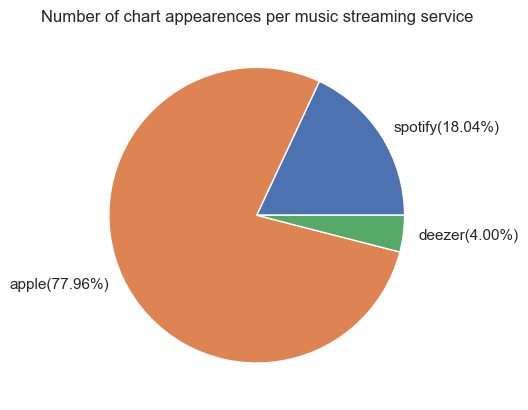

In [141]:
x = [s_percent, a_percent, d_percent]
label = [f'spotify({s_percent:.2f}%)', f'apple({a_percent:.2f}%)', f'deezer({d_percent:.2f}%)']
fig, ax = plt.subplots()

ax.pie(x,labels=label)

plt.title("Number of chart appearences per music streaming service")
plt.show()